In [1]:
import os

import numpy as np

from main.make_ics import InintialConditions
from main.simulate import NBodySimulation
import main.plot_utils as pu

- Load an image 
- Choose the number of bodies `N` of your simulation, and initialize the `InitialConditions` class to set up the ICs of the simulation. The image in greyscale is used to infer a distribution for the `N` points. The arguments are:
    - `MASS`: Total mass of the system. This is how you tune the strength of the interaction between bodies, which are all set to have the same mass (`M/N`)
    - `R_CM`: Center of mass of the system.
    - `V_CM`: Velocity of center of mass. Change it if you want the whole system to move uniformly
    - `invert`: If `False` then darker parts in the image have higehr density of particles, and otherwhise if `True`.
- Optionally, set a circular velocity for the system using the `set_circular_velocity()` method. Each particle is then given a velocity that *would be* circular in the idealized case of massles bodies orbiting a CM of mass equal to `MASS`. The argument `factor` is basically a scaling factor. Too high and particles are blown away by inertia.  
- Next, use the `set_plot` method to check on how you scatter plot looks. This part is important, because later, when rendering the simulation output, plotting parameters are defaulted from this plot, so the final animation looks the same.  
- Finally, you generate the initial conditions file in a `.hdf5` format, to be read next when performing the simulation.


Also, we print the interparticle distance because is a good reference when setting up the softening length afterwards. Ideally, it should be roughly on the same order for a 'realistic' simulation (if that is what we want)

Mean interparticle distance: 1.34e-02


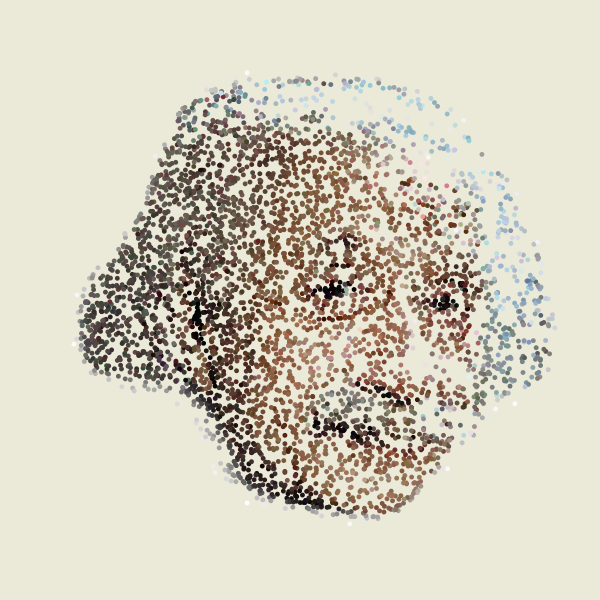

In [6]:
image_path = "sample_images/einstein.jpg"

# Load image and create N bodies
N = 5e3
Ics = InintialConditions(image_path, N, MASS=2, R_CM=[0, 0], V_CM=[0, 0], invert=True)

# Set cirular velocity (optional)
Ics.set_circular_velocity(factor=0.5)

# Set plot parameters
Ics.set_plot(
    marker_size=0.75,
    lim=0.55,  # limits of the plot
    facecolor="#ebe9d8",  # background color
    ax_color="k",  # axes color (if any)
    greyscale=False,  # use color or not
    ax_spines=False,  # show ax spines
    show=True,  # show the plot
)

# Generate Initial conditions file
simulation_folder = f"results/example/"
path_ics = simulation_folder + f"initial_conditions.hdf5"
Ics.generate_ic_file(path_ics)


- Set up the simulation with the `NBodySimulation` class. 

In [11]:
# Simulate output is saved at 
path_output = simulation_folder + 'output.hdf5'

Sim = NBodySimulation(path_ics, path_output)

T = 3  # Total simulation time
dt = 0.01  # Time step
num_snapshots = 300  # number of snapshots to save

Sim.set_time(T, dt, 
             snapshots=num_snapshots
             )

# Estimate the runtime by running num_steps steps
Sim.estimate_runtime(num_steps=3)

Estimated time: 00h 00m 09s
Mean time per step: 3.08e-02 s


- Specify a softening length `e` and run the simulation

In [12]:
e = 0.05
Sim.run_simulation(e)

100.00%
Elapsed time: 8.33 s


- Create the final animation using `make_animation` from `plot_utils.py`. All plot attributes, when not specified as arguments, are set by those generated above when creating the ICs file. The function saves frames in a folder and renders them into `.mp4` format or `.gif`.

In [13]:
pu.make_animation(
    path_output,
    fig_size=720,
    ratio=1,  # aspect ratio
    # marker_size=0.25,
    # lim=0.6,
    # ax_spines=False,
    fps=30,  # frames per second
    delete_frames=True,  # delete frames after creating the video
    reverse=False,  # time-reverse the video
    format="mp4",  # video format: .mp4 or .gif
)

Save images time: 9.82 s
Video creation time: 5.08 s
